# ***Simple Linear Regression***

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
tesla_data = pd.read_csv("/content/TSLA.csv")

In [ ]:
tesla_data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
1,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
3,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
4,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500
5,2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000
6,2010-07-09,3.516,3.580,3.310,3.480,3.480,20253000
7,2010-07-12,3.590,3.614,3.400,3.410,3.410,11012500
8,2010-07-13,3.478,3.728,3.380,3.628,3.628,13400500
9,2010-07-14,3.588,4.030,3.552,3.968,3.968,20976000


In [ ]:
tesla_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2579 non-null   object 
 1   Open       2579 non-null   float64
 2   High       2579 non-null   float64
 3   Low        2579 non-null   float64
 4   Close      2579 non-null   float64
 5   Adj Close  2579 non-null   float64
 6   Volume     2579 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 141.2+ KB


In [ ]:
tesla_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2.579000e+03
mean,49.206686,50.301806,48.073117,49.253279,49.253279,3.078217e+07
std,57.934102,59.888383,55.852349,58.119783,58.119783,2.855717e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,7.159000,7.268000,6.989000,7.153000,7.153000,1.047400e+07
50%,44.001999,44.660000,43.301998,43.924000,43.924000,2.413100e+07
75%,59.339000,60.171000,57.841000,59.020000,59.020000,3.979150e+07
max,502.140015,502.489990,470.510010,498.320007,498.320007,3.046940e+08


In [ ]:
tesla_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
tesla_data.duplicated().sum()

0

In [ ]:
tesla_data = tesla_data.dropna()

<Axes: >

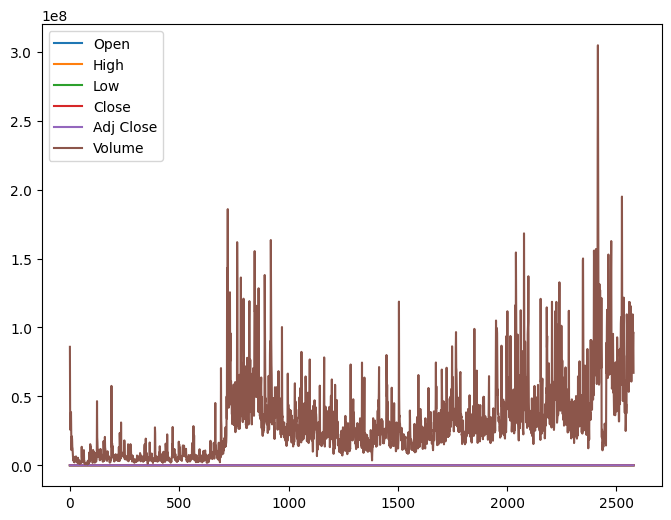

In [ ]:
tesla_data.plot(kind='line', figsize=(8,6))

In [ ]:
tesla_data['Date'].value_counts()

2010-06-30    1
2017-03-22    1
2017-04-24    1
2017-04-25    1
2017-04-26    1
             ..
2013-11-27    1
2013-11-29    1
2013-12-02    1
2013-12-03    1
2020-09-25    1
Name: Date, Length: 2579, dtype: int64

In [ ]:
#converting int64 dtype to datetime64 dtype
tesla_data['Date']=pd.to_datetime(tesla_data['Date'])
tesla_data['Date']

0      2010-06-30
1      2010-07-01
2      2010-07-02
3      2010-07-06
4      2010-07-07
          ...    
2574   2020-09-21
2575   2020-09-22
2576   2020-09-23
2577   2020-09-24
2578   2020-09-25
Name: Date, Length: 2579, dtype: datetime64[ns]

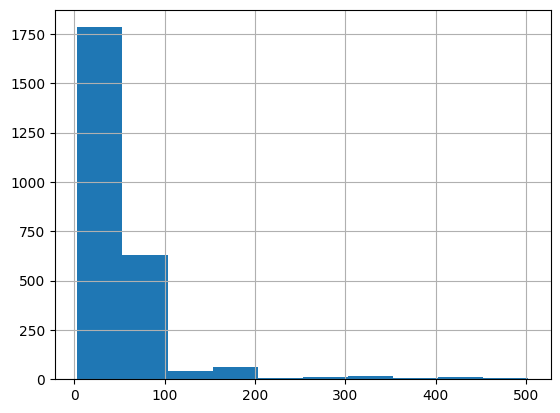

In [ ]:
tesla_data['High'].hist()
plt.show()

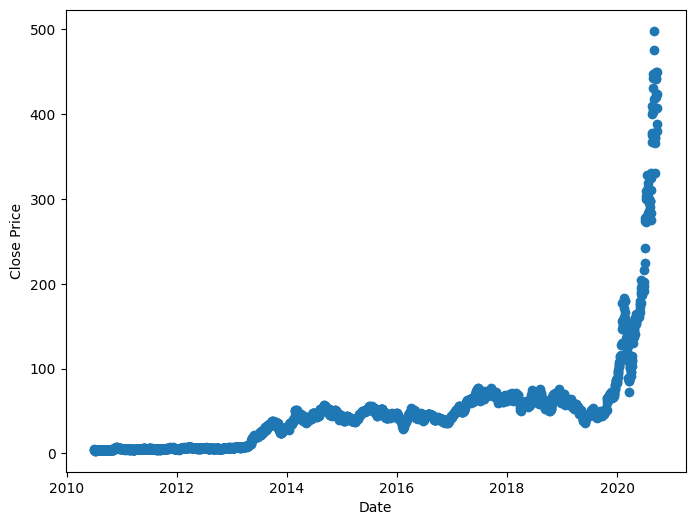

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(tesla_data['Date'], tesla_data['Close'], label="Closing Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

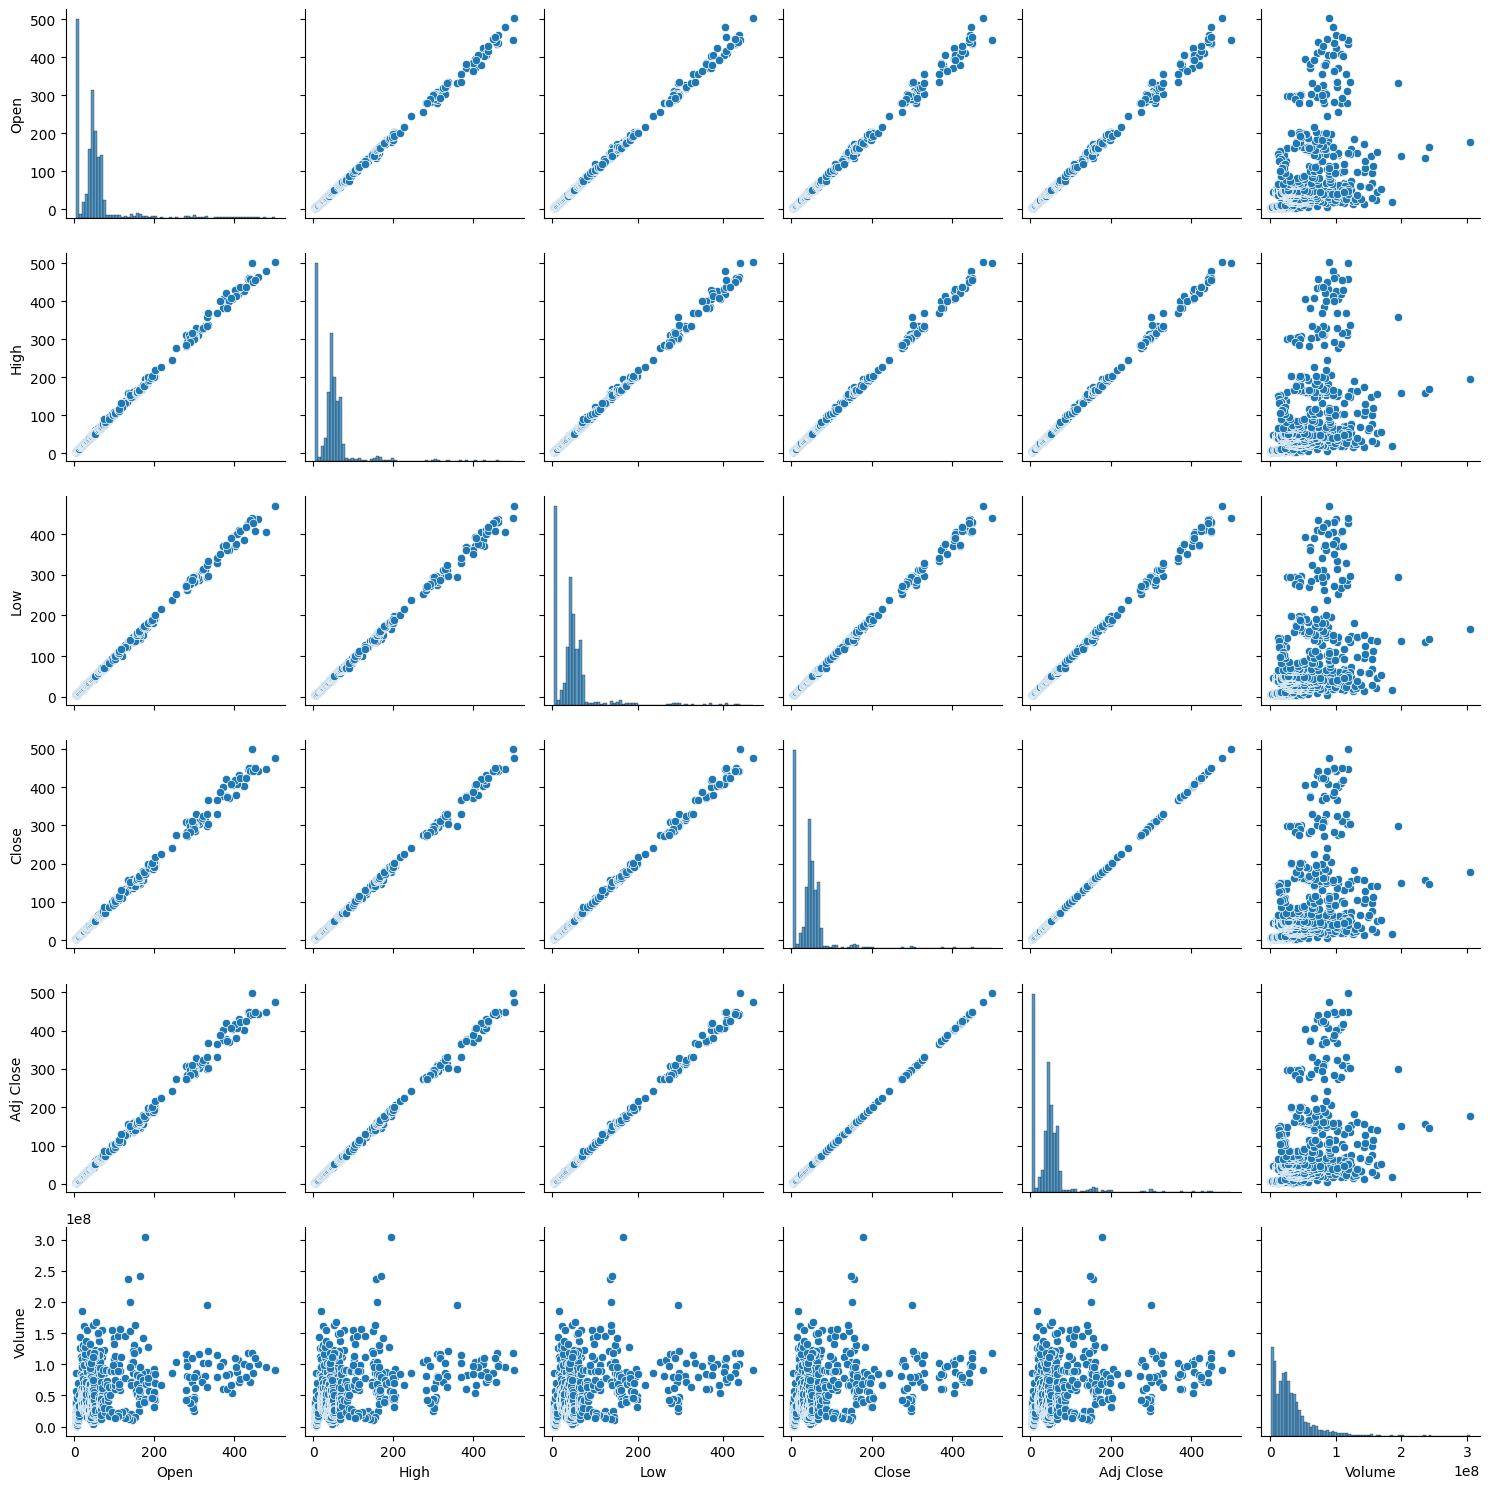

In [ ]:
import seaborn as sns

features = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]
sns.pairplot(tesla_data[features])

plt.tight_layout()

plt.show()

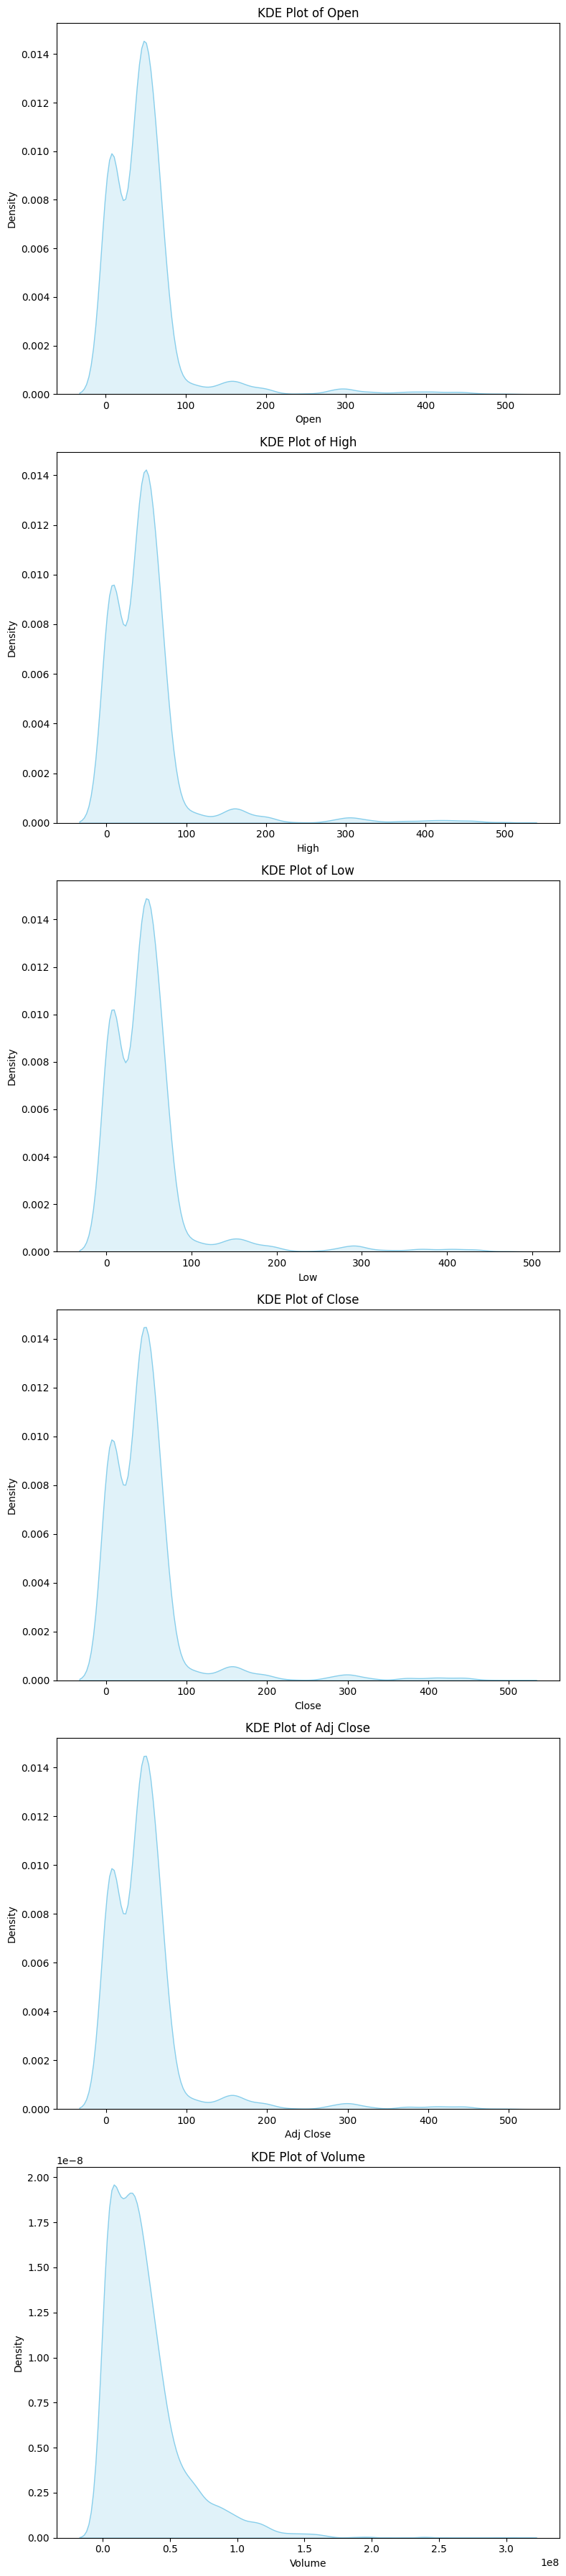

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]

fig, axs = plt.subplots(nrows=len(features), figsize=(8, 6 * len(features)))

for i, feature in enumerate(features):
    sns.kdeplot(data=tesla_data[feature], ax=axs[i], color='skyblue', fill=True)
    axs[i].set_title(f'KDE Plot of {feature}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Density')

plt.tight_layout()
plt.show()


In [ ]:
X = tesla_data[['High','Low','Open','Volume']].values
Y = tesla_data['Close'].values

In [ ]:
X

array([[6.08400000e+00, 4.66000000e+00, 5.15800000e+00, 8.59355000e+07],
       [5.18400000e+00, 4.05400000e+00, 5.00000000e+00, 4.10940000e+07],
       [4.62000000e+00, 3.74200000e+00, 4.60000000e+00, 2.56990000e+07],
       ...,
       [4.12149994e+02, 3.75880005e+02, 4.05160004e+02, 9.50742000e+07],
       [3.99500000e+02, 3.51299988e+02, 3.63799988e+02, 9.65611000e+07],
       [4.08730011e+02, 3.91299988e+02, 3.93470001e+02, 6.70684000e+07]])

In [ ]:
Y

array([  4.766   ,   4.392   ,   3.84    , ..., 380.359985, 387.790009,
       407.339996])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [ ]:
lr_model = LinearRegression()

In [ ]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr_model.predict(X_test)

In [ ]:
y_pred

array([ 33.21685564,  64.29929557,  24.20290922,   5.00027245,
        40.49101978, 352.22371969, 163.4192047 ,  51.46067912,
        41.7462994 ,  62.32041253,  89.09828496,  56.03542883,
        74.13220095,  44.27351304,  43.82268832,   5.87200218,
         4.78989294,  54.04456437,  50.78551425,  44.76563133,
         6.64768857,  43.52817281, 131.39543474,   8.35917324,
        41.22598592, 299.28046232,   4.35255489,   4.39224983,
        38.06665009,  35.65046524,  20.24562423,  46.64529193,
        61.62488447,  38.98775655,   4.70631221,  23.64309265,
         6.99929107,  46.24672416,   4.32597808,  39.89215777,
         5.68655515,   7.20333461,   4.99198035,  59.56751407,
        63.65494209,  43.78704327,  66.63718264,  44.57099997,
         7.82066849,  62.75835145,   8.09573133,  43.32188428,
        39.19349473,  54.27335684,  45.90489839,   5.54490659,
        45.74046465, 299.1893317 ,  48.94167442,  62.94714144,
        97.19794576,  74.64672285,   4.33986403,   6.47

In [ ]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)
print("R-squared Score:", r_squared)

R-squared Score: 0.9988805291738628


In [ ]:
# Evaluate Linear Regression
from sklearn.metrics import mean_absolute_error
# Evaluate the model on the test data.
score = lr_model.score(X_test, y_test)

# Print the score.
print('The score of the model is:', score)

lr_mae = mean_absolute_error(y_test, y_pred)
print(f'\nLinear Regression Mean Absolute Error: {lr_mae}')

The score of the model is: 0.9988805291738628

Linear Regression Mean Absolute Error: 0.6108965493876457


In [ ]:
data1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : y_pred.flatten()})

In [ ]:
data1

,Actual,Predicted
0,33.245998,33.216856
1,65.316002,64.299296
2,24.454000,24.202909
3,4.746000,5.000272
4,39.970001,40.491020
...,...,...
769,4.390000,4.530603
770,4.616000,4.923454
771,36.785999,36.555000
772,5.468000,5.607917


In [ ]:
import math
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 0.6108965493876457
Mean Squared Error: 3.8208419408389656
Root Mean Squared Error: 1.9546974039065397


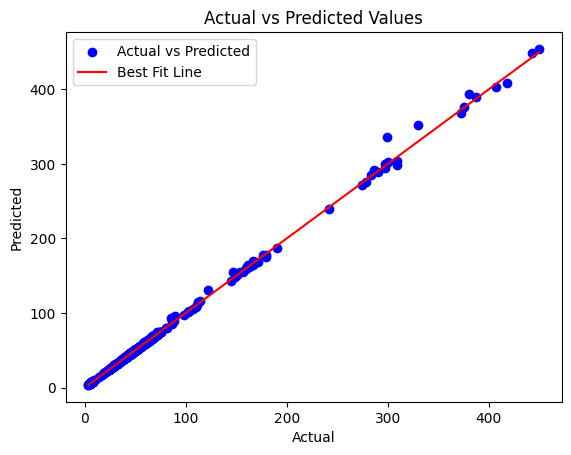

In [ ]:
data1.sort_values(by='Actual', inplace=True)

plt.scatter(data1['Actual'], data1['Predicted'], color='blue', label='Actual vs Predicted')

x = np.linspace(data1['Actual'].min(), data1['Actual'].max(), 100)
plt.plot(x, x, color='red', label='Best Fit Line')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()

plt.show()

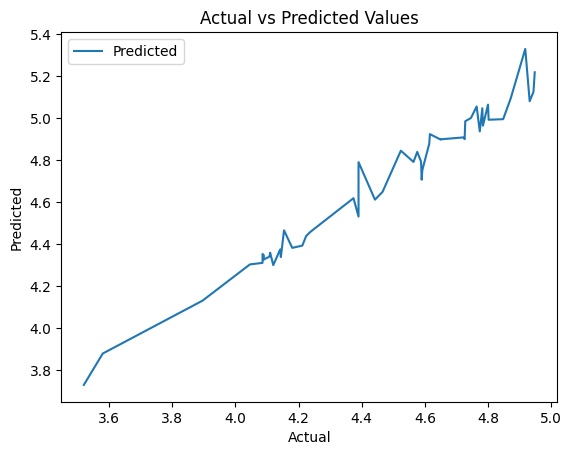

In [ ]:
graph = data1.head(50)
graph.plot(x='Actual', y='Predicted', kind='line')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

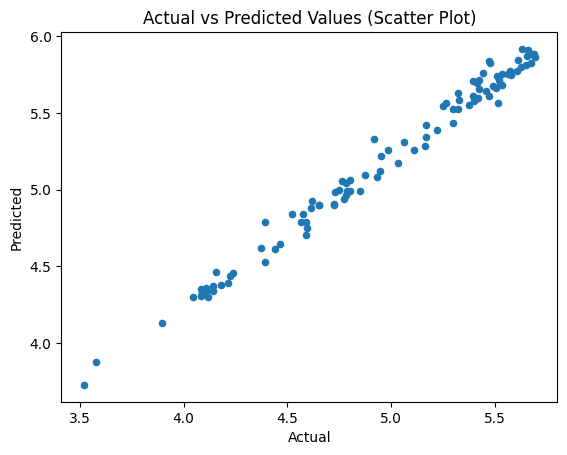

In [ ]:
graph = data1.head(100)
graph.plot(x='Actual', y='Predicted', kind='scatter')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Scatter Plot)')
plt.show()

<Figure size 1200x600 with 0 Axes>

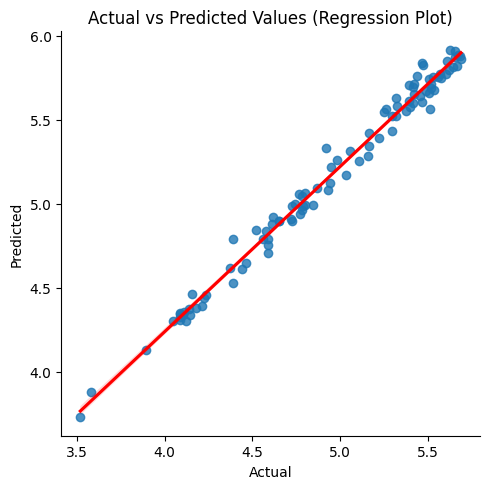

In [ ]:
graph_data = data1.head(100)
plt.figure(figsize=(12,6))
sns.lmplot(x='Actual', y='Predicted', data=graph_data, line_kws={'color': 'red'})

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Regression Plot)')
plt.tight_layout()
plt.show()